<a href="https://colab.research.google.com/github/crudolphMQU/Brain-MRI-Image-Classifier/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Purpose of this notebook is to explore clustering techniques and visualisation.

The dataset was accessed through kaggle.

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

**CUST_ID** : Identification of Credit Card holder (Categorical)

**BALANCE** : Balance amount left in their account to make purchases

**BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES** : Amount of purchases made from account

**ONEOFF_PURCHASES** : Maximum purchase amount done in one-go

**INSTALLMENTS_PURCHASES** : Amount of purchase done in installment

**CASH_ADVANCE** : Cash in advance given by the user

**PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid

**CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"

**PURCHASES_TRX** : Numbe of purchase transactions made

**CREDIT_LIMIT** : Limit of Credit Card for user

**PAYMENTS** : Amount of Payment done by user

**MINIMUM_PAYMENTS** : Minimum amount of payments made by user

**PRCFULLPAYMENT** : Percent of full payment paid by user

**TENURE** : Tenure of credit card service for user.



# Mounting Google drive, reading data

In [11]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# change into the correct directory
import os
os.chdir('/content/drive/MyDrive/Coding/Credit card clustering/')

In [13]:
ls 'data'

'CC GENERAL.csv'


In [14]:
# reading the data
import pandas as pd

file_path = 'data/CC GENERAL.csv'
df = pd.read_csv(file_path)

In [15]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data preprocessing

## Exploration and null values

In [16]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [17]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


There are 313 customers that have null minimum_payments made by the user or the data is missing. This accounts for 3% of the all the data.

In [19]:
# find locations of null values
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']

,MINIMUM_PAYMENTS
3,NaN
45,NaN
47,NaN
54,NaN
55,NaN
...,...
8919,NaN
8929,NaN
8935,NaN
8944,NaN


In [31]:
df.loc[8935]

,8935
CUST_ID,C19176
BALANCE,183.817004
BALANCE_FREQUENCY,1.0
PURCHASES,465.9
ONEOFF_PURCHASES,0.0
INSTALLMENTS_PURCHASES,465.9
CASH_ADVANCE,0.0
PURCHASES_FREQUENCY,1.0
ONEOFF_PURCHASES_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.833333


In [22]:
df['MINIMUM_PAYMENTS'].describe()

,MINIMUM_PAYMENTS
count,8637.000000
mean,864.206542
std,2372.446607
min,0.019163
25%,169.123707
50%,312.343947
75%,825.485459
max,76406.207520


There could be a variety of reasons why there are missing values. As there is an insignificant number of rows missing values, we will first exclude it from the main dataset and compare the results afterwards. We will also check clustering on the subset to determine any relationships in the subset.

In [36]:
subset_df = df.loc[df['MINIMUM_PAYMENTS'].isnull()]

In [37]:
subset_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12


In [39]:
# Replace null values in the 'CREDIT_LIMIT' column with the mean of that column
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

# Drop rows where the 'MINIMUM_PAYMENTS' column is null
cleaned_df = df.dropna(subset=['MINIMUM_PAYMENTS'])

## Outliers

In [48]:
# checking column data types
cleaned_df.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


In [43]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(cleaned_df.select_dtypes(include=[np.number])))

# Define a threshold for identifying outliers (commonly 3)
threshold = 3

# Get a boolean mask of outliers
outliers_z = (z_scores > threshold).any(axis=1)

# Display outliers
cleaned_df[outliers_z]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.00,12
19,C10020,3577.970933,1.000000,398.64,0.00,398.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.00,12
20,C10021,2016.684686,1.000000,176.68,0.00,176.68,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,2000.0,223.068600,13557.297260,0.00,12
21,C10022,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.00,12
23,C10024,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


In [51]:
# Exclude the 'CUST_ID' column and select only numeric columns
numeric_df = cleaned_df.drop(columns=['CUST_ID'])

# Calculate the IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get a boolean mask of outliers
outliers_iqr = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)

# Display outliers
cleaned_df[outliers_iqr]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Z score found 1447 outliers, IQR found 5686 outliers.

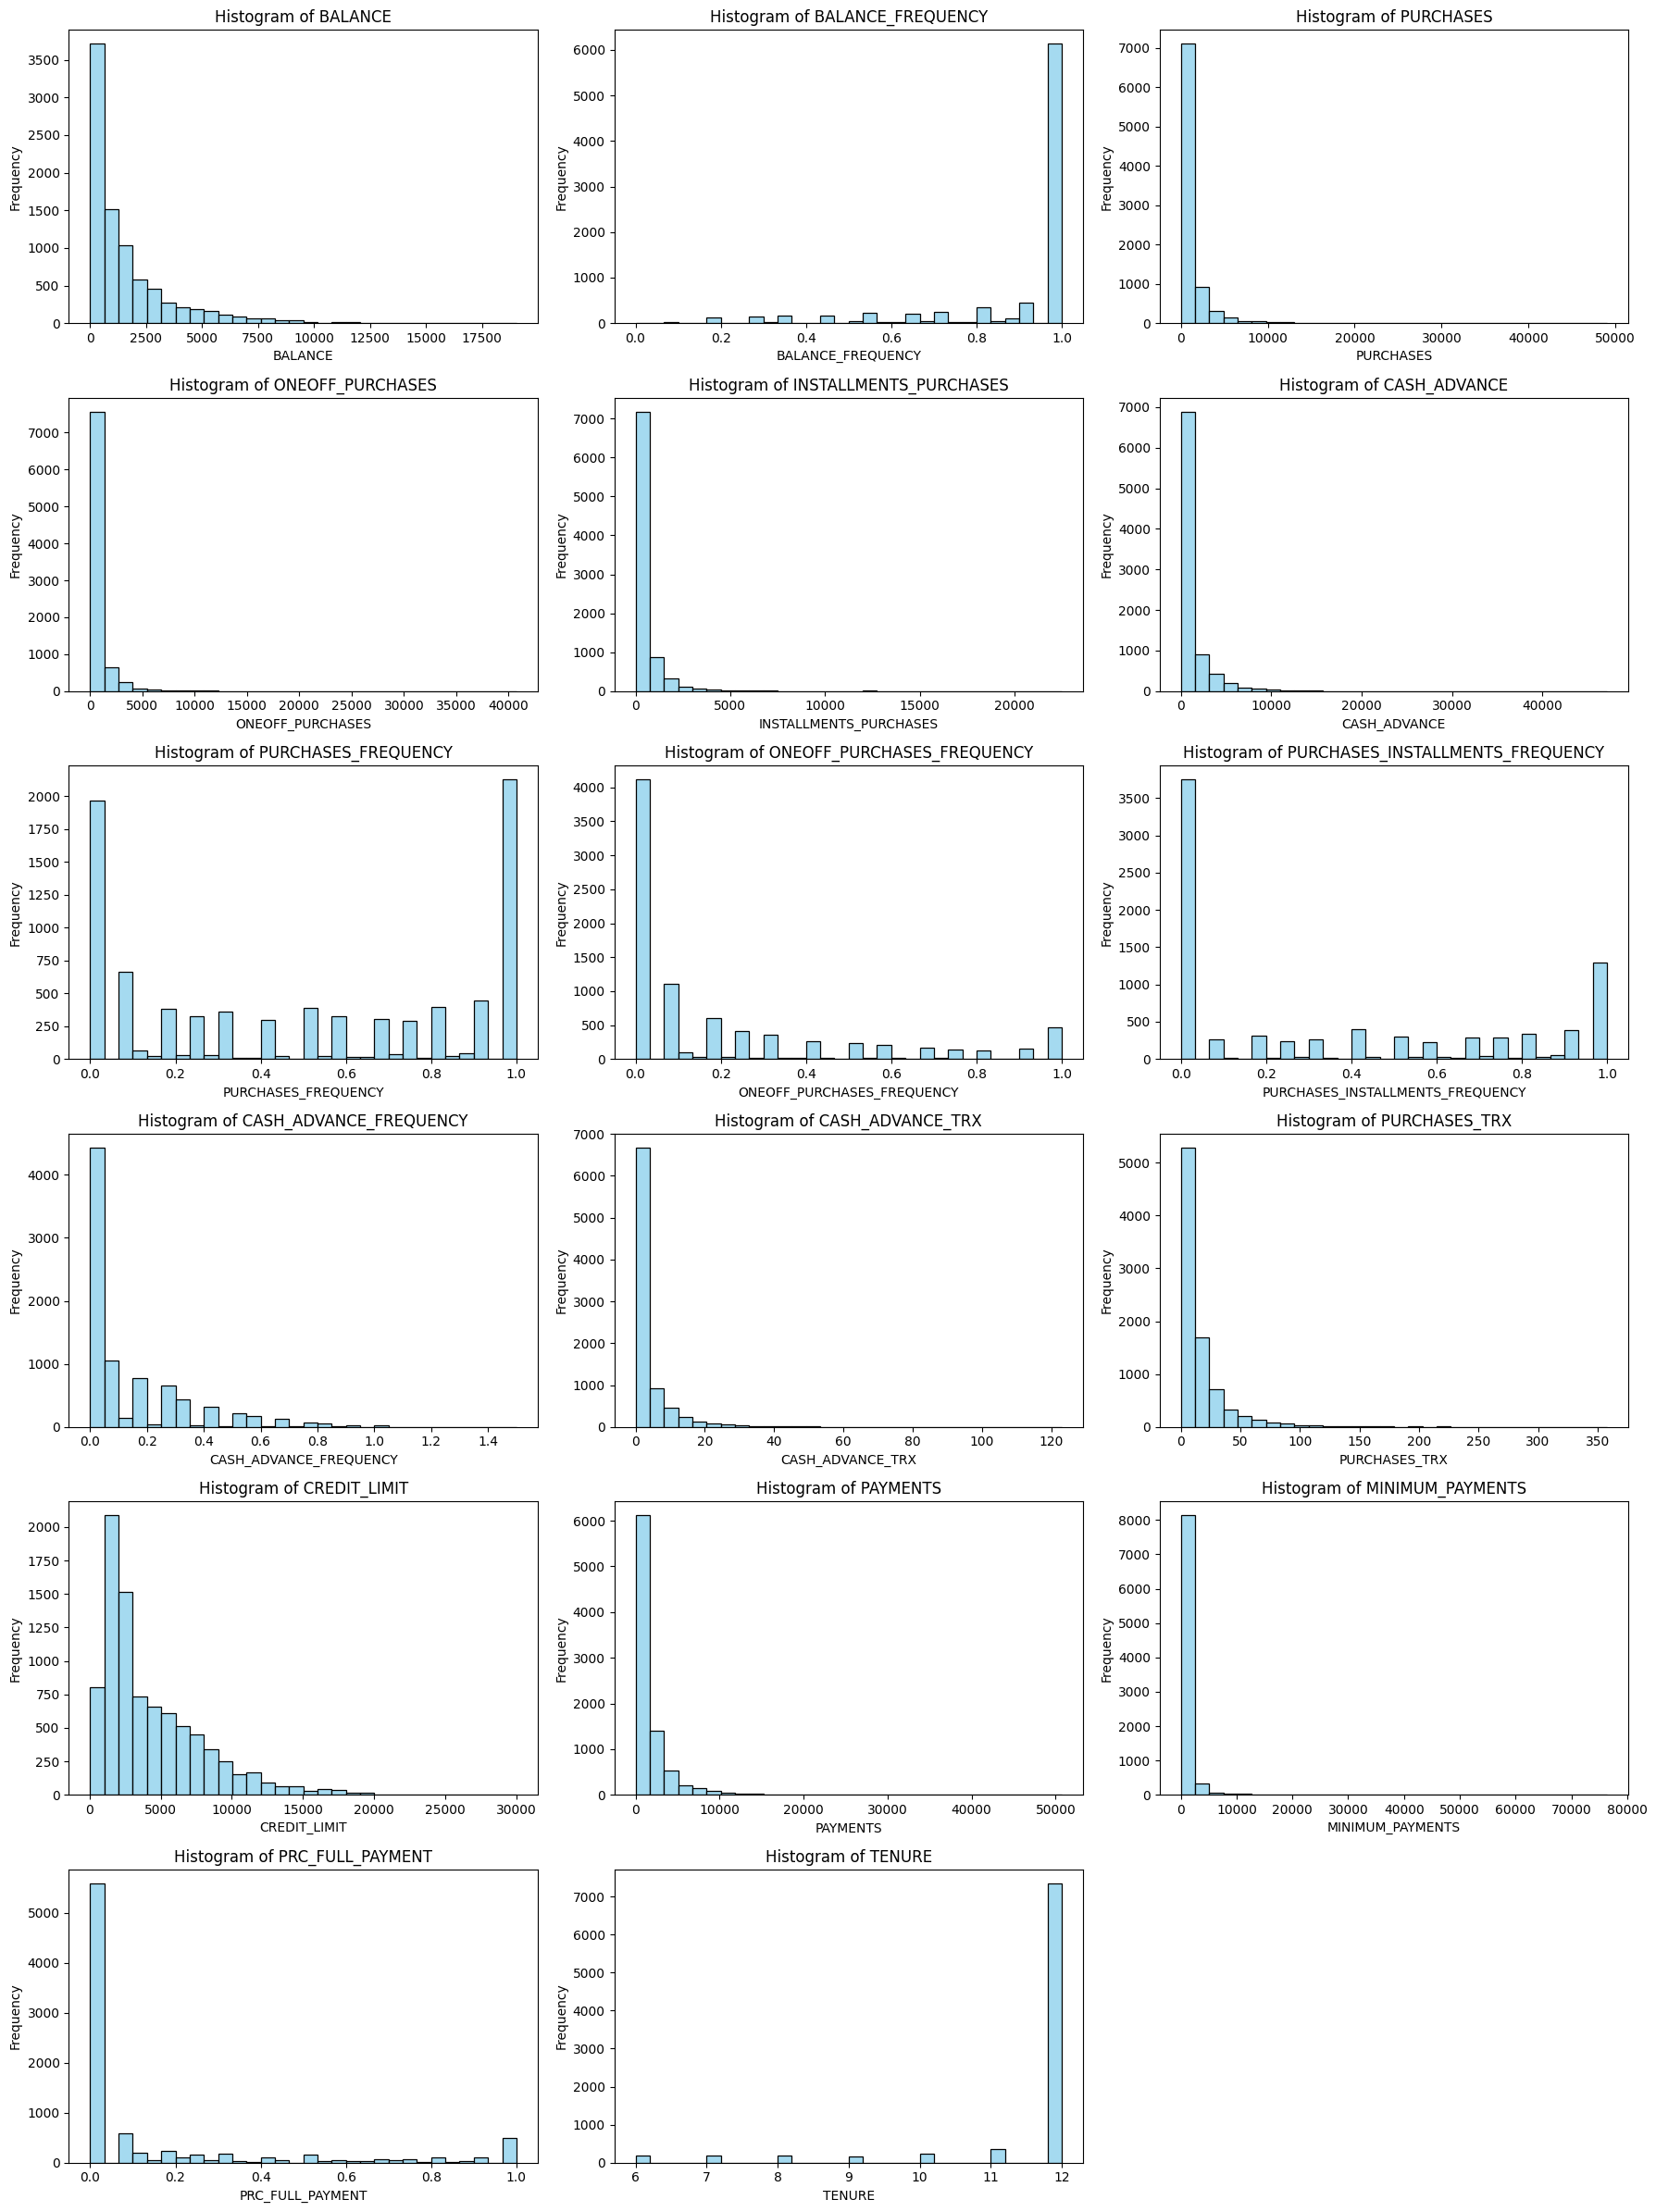

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns (excluding 'CUST_ID')
numeric_df = cleaned_df.drop(columns=['CUST_ID'])

# Determine the number of columns
num_columns = numeric_df.shape[1]

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=num_columns//3 + (num_columns % 3 > 0), ncols=3, figsize=(18, 4 * (num_columns//3 + 1)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numeric column
for i, col in enumerate(numeric_df.columns):
    sns.histplot(numeric_df[col], bins=30, kde=False, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

The frequency columns are of values between 1 and 0 as per the dictionary, not binary values.

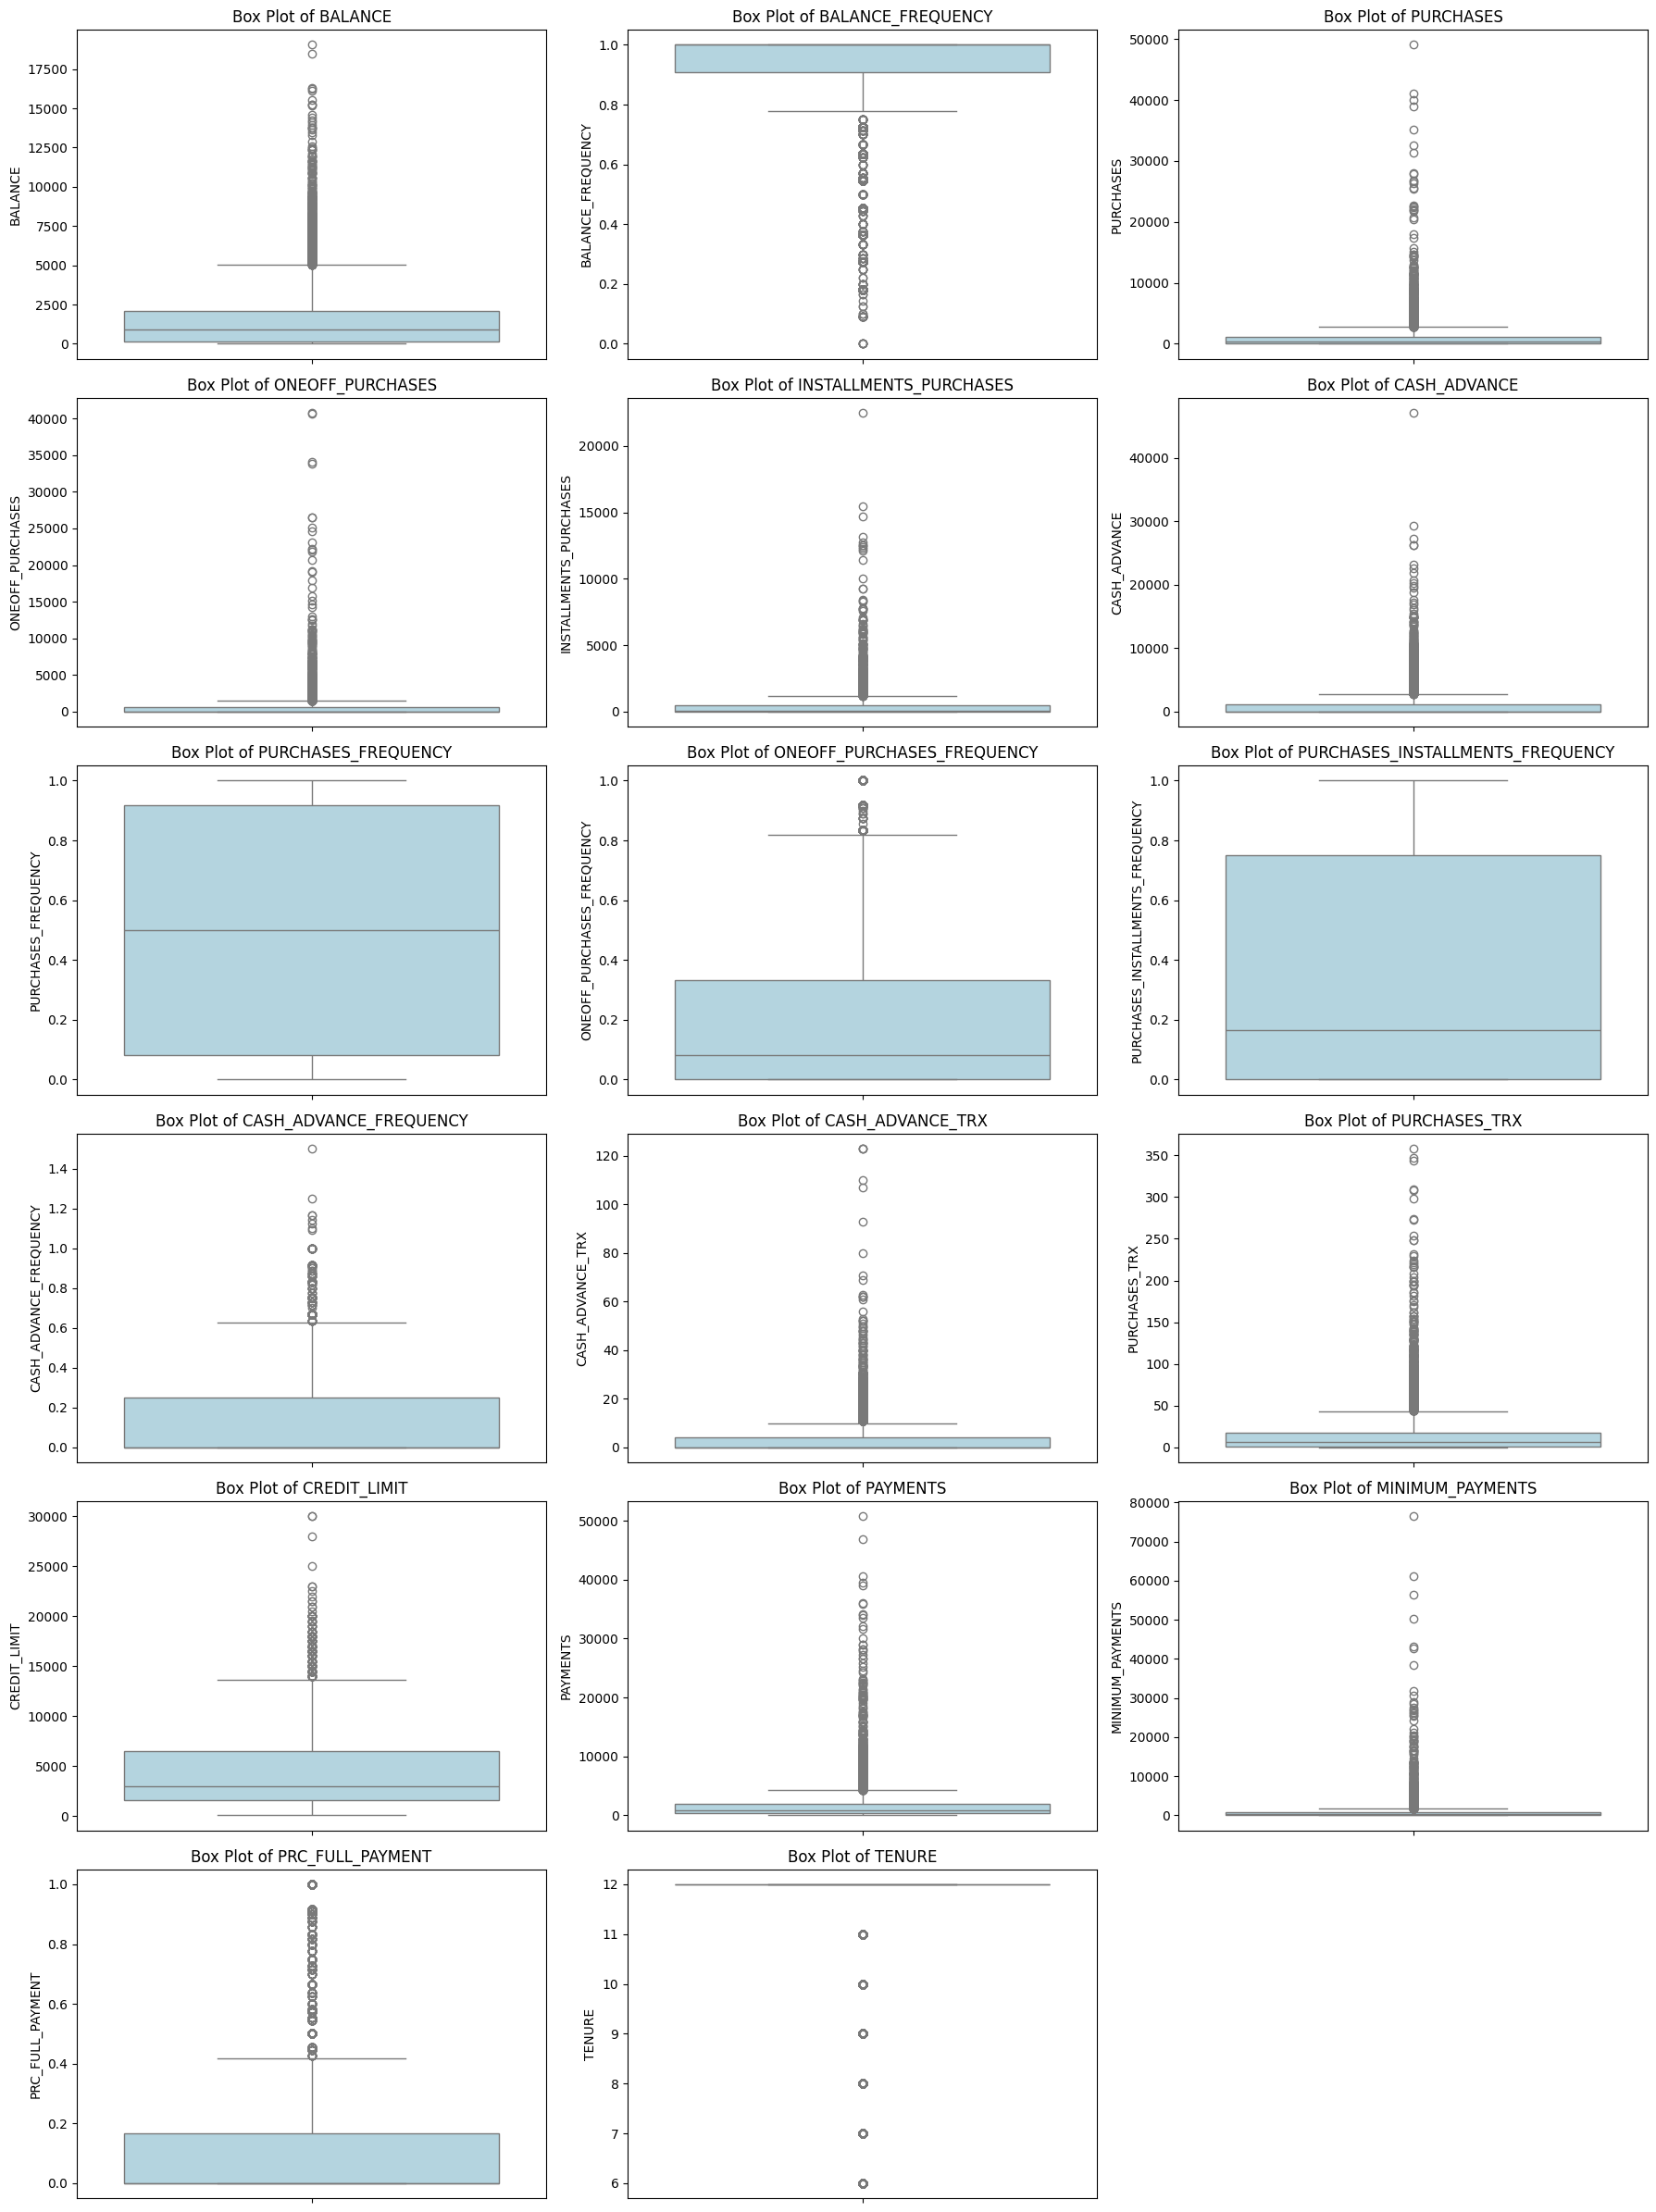

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns (excluding 'CUST_ID')
numeric_df = cleaned_df.drop(columns=['CUST_ID'])

# Determine the number of columns
num_columns = numeric_df.shape[1]

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=num_columns//3 + (num_columns % 3 > 0), ncols=3, figsize=(18, 4 * (num_columns//3 + 1)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot box plots for each numeric column
for i, col in enumerate(numeric_df.columns):
    sns.boxplot(y=numeric_df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### IQR and Z score visualisation

In [63]:
from scipy import stats
import numpy as np

# Select only numeric columns (excluding 'CUST_ID')
numeric_df = cleaned_df.drop(columns=['CUST_ID'])

# Z-Score Method
z_scores = np.abs(stats.zscore(numeric_df))
z_outliers = (z_scores > 3).any(axis=1)
df_no_z_outliers = numeric_df[~z_outliers]

# IQR Method
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
iqr_outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
df_no_iqr_outliers = numeric_df[~iqr_outliers]

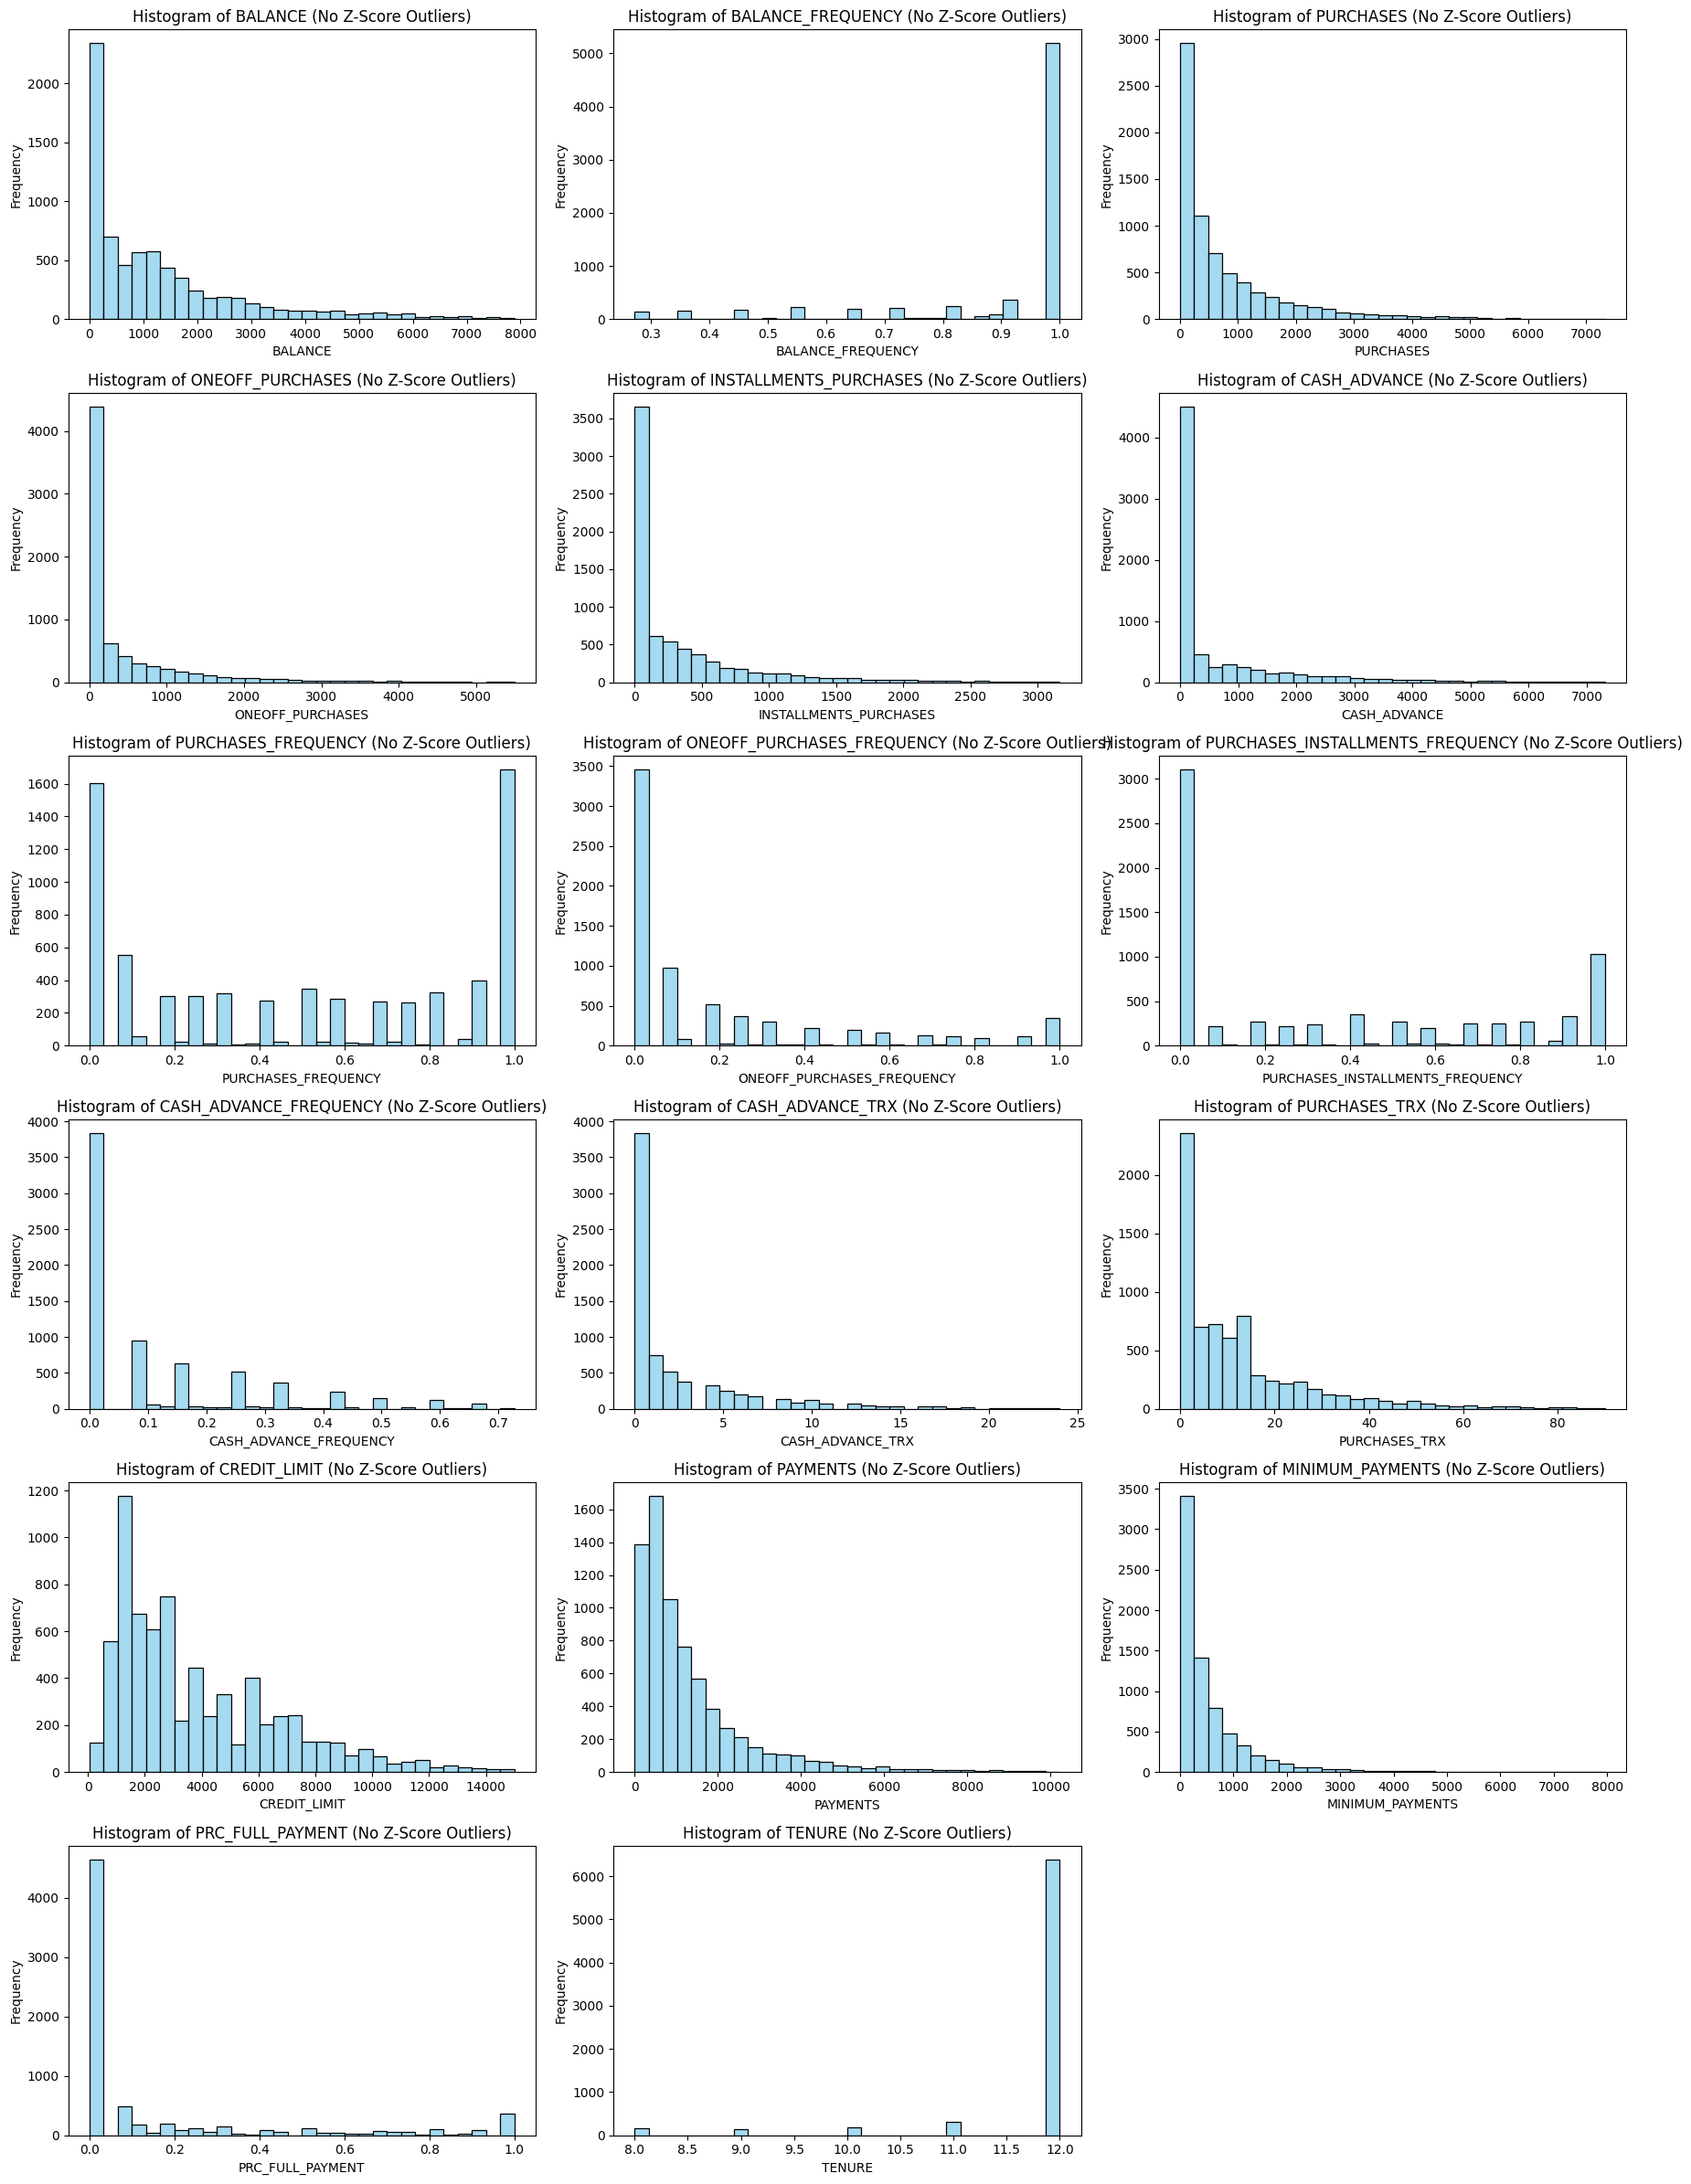

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of columns
num_columns = df_no_z_outliers.shape[1]

# Set up figure and axes for histograms
fig, axes = plt.subplots(nrows=num_columns//3 + (num_columns % 3 > 0), ncols=3, figsize=(18, 4 * (num_columns//3 + 1)))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(df_no_z_outliers.columns):
    sns.histplot(df_no_z_outliers[col], bins=30, kde=False, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {col} (No Z-Score Outliers)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

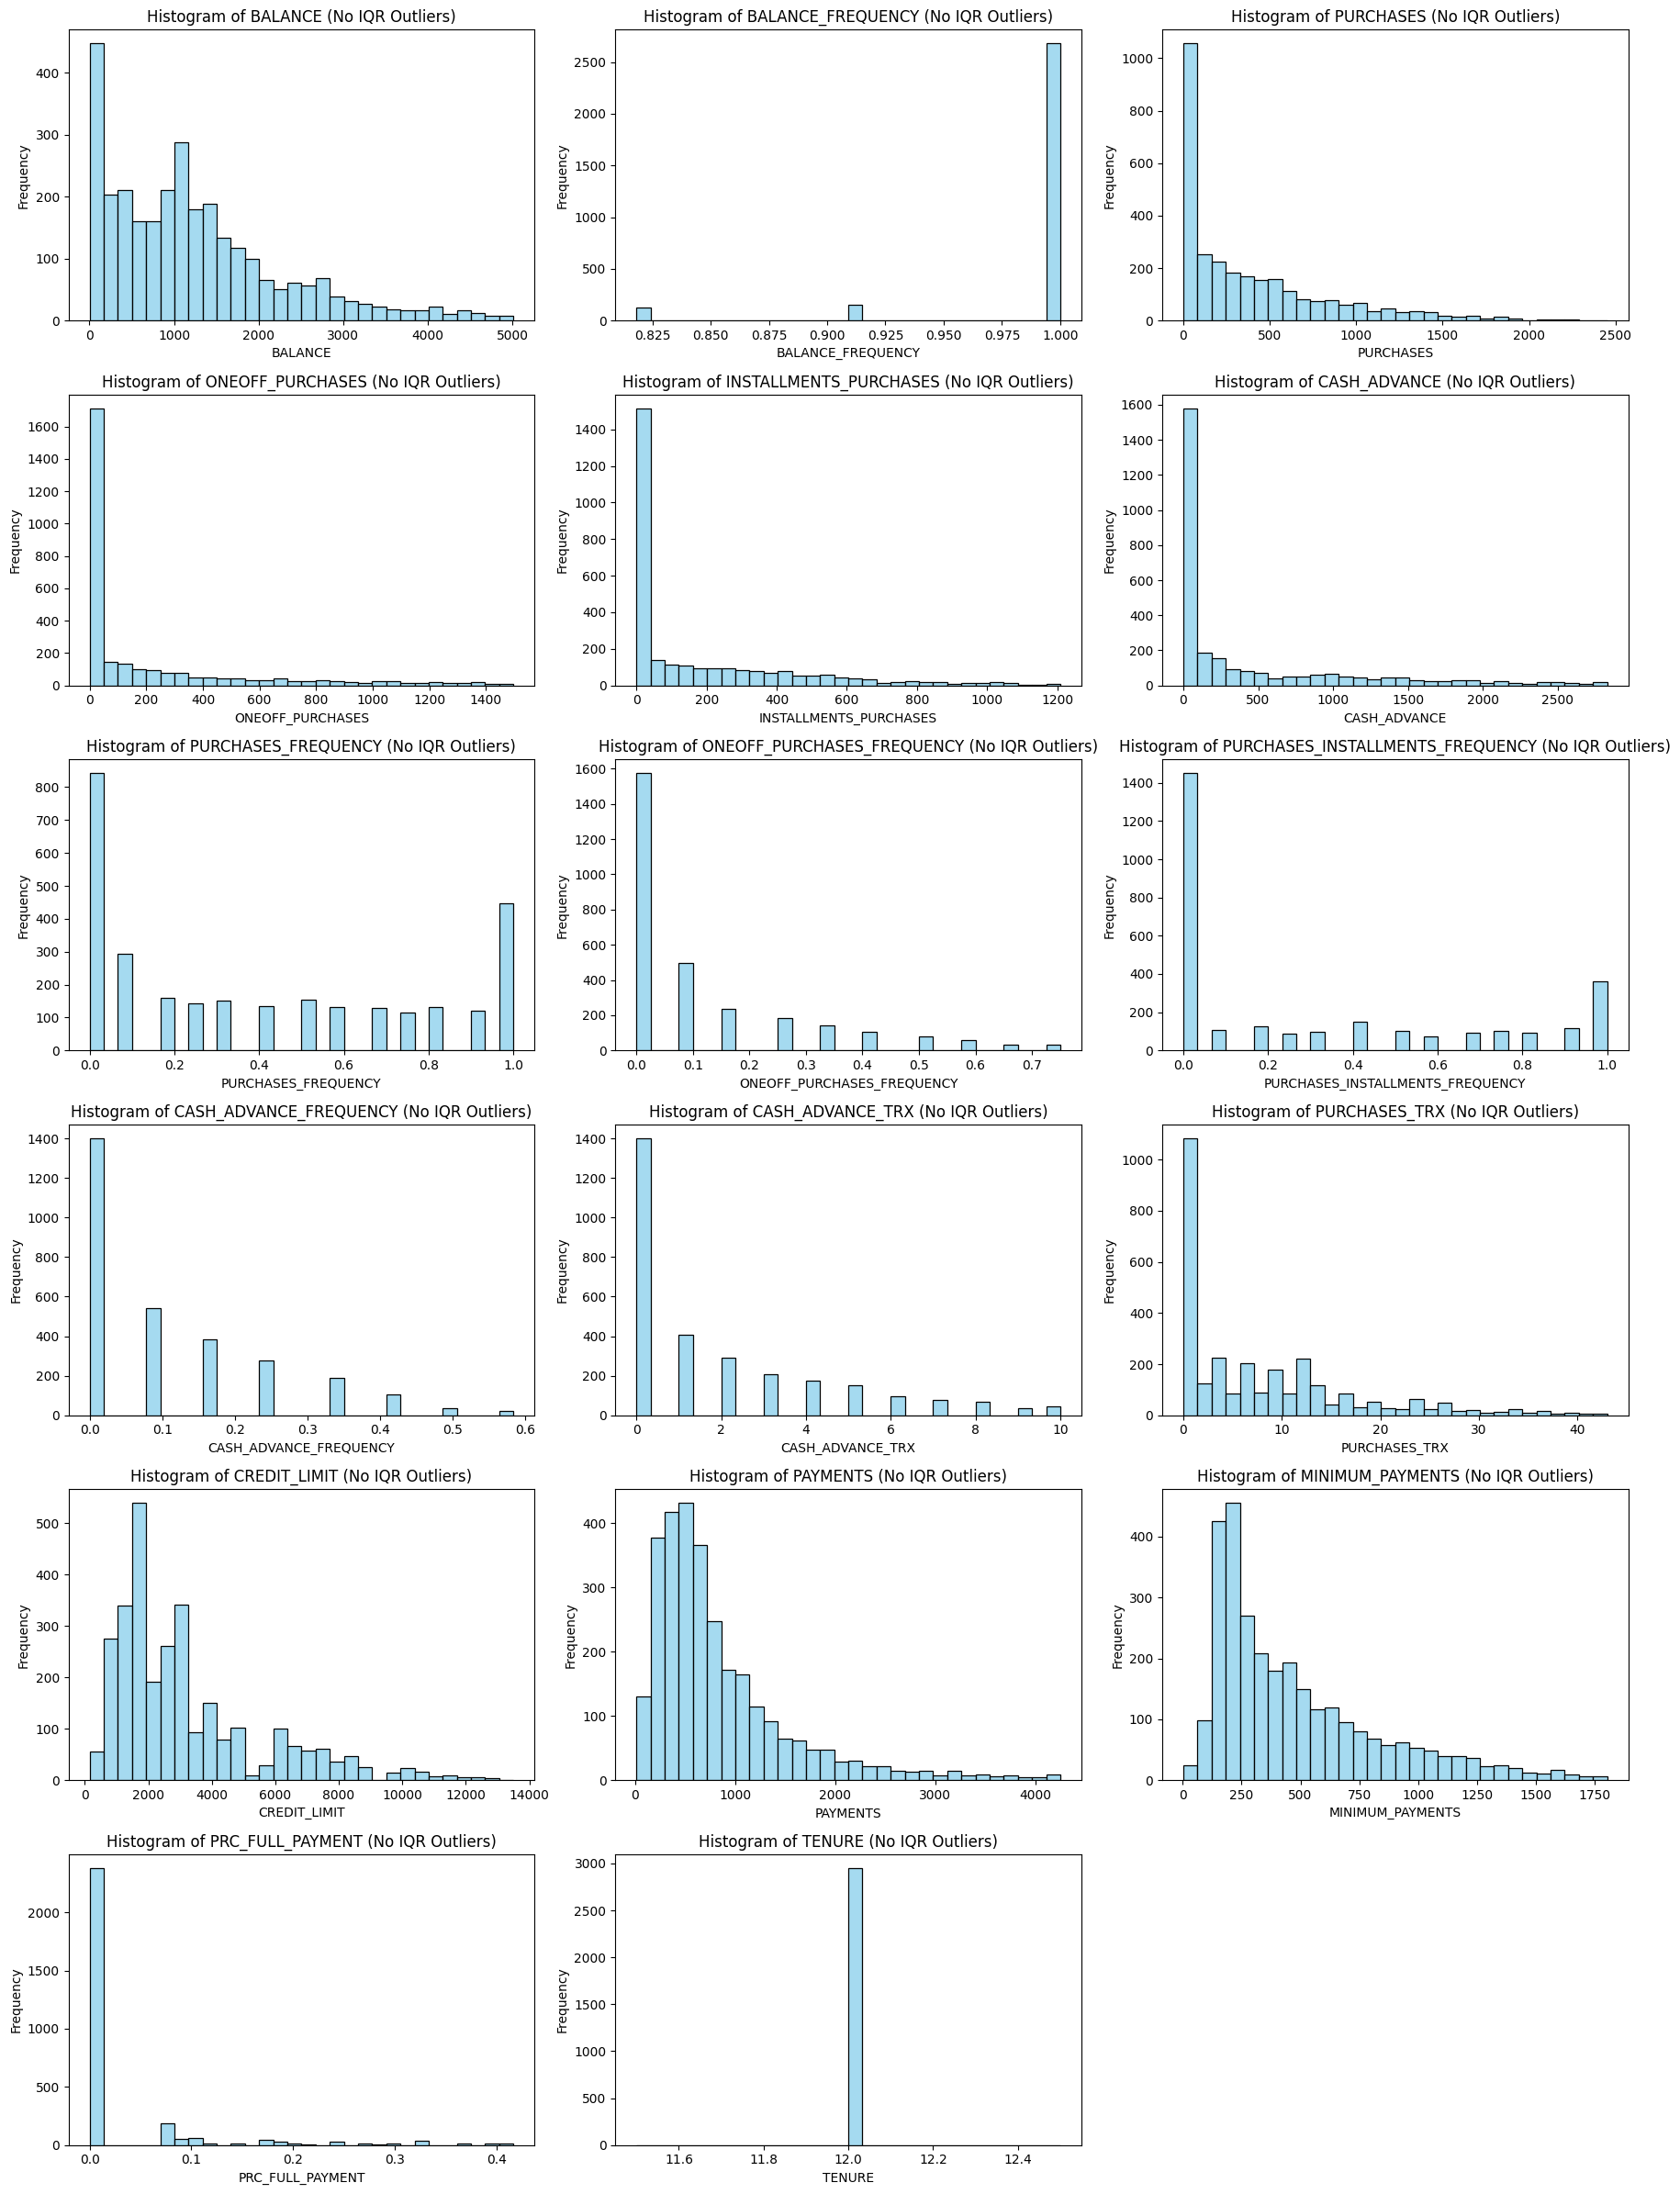

In [66]:
# Number of columns
num_columns = df_no_iqr_outliers.shape[1]

# Set up figure and axes for histograms
fig, axes = plt.subplots(nrows=num_columns//3 + (num_columns % 3 > 0), ncols=3, figsize=(18, 4 * (num_columns//3 + 1)))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(df_no_iqr_outliers.columns):
    sns.histplot(df_no_iqr_outliers[col], bins=30, kde=False, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {col} (No IQR Outliers)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


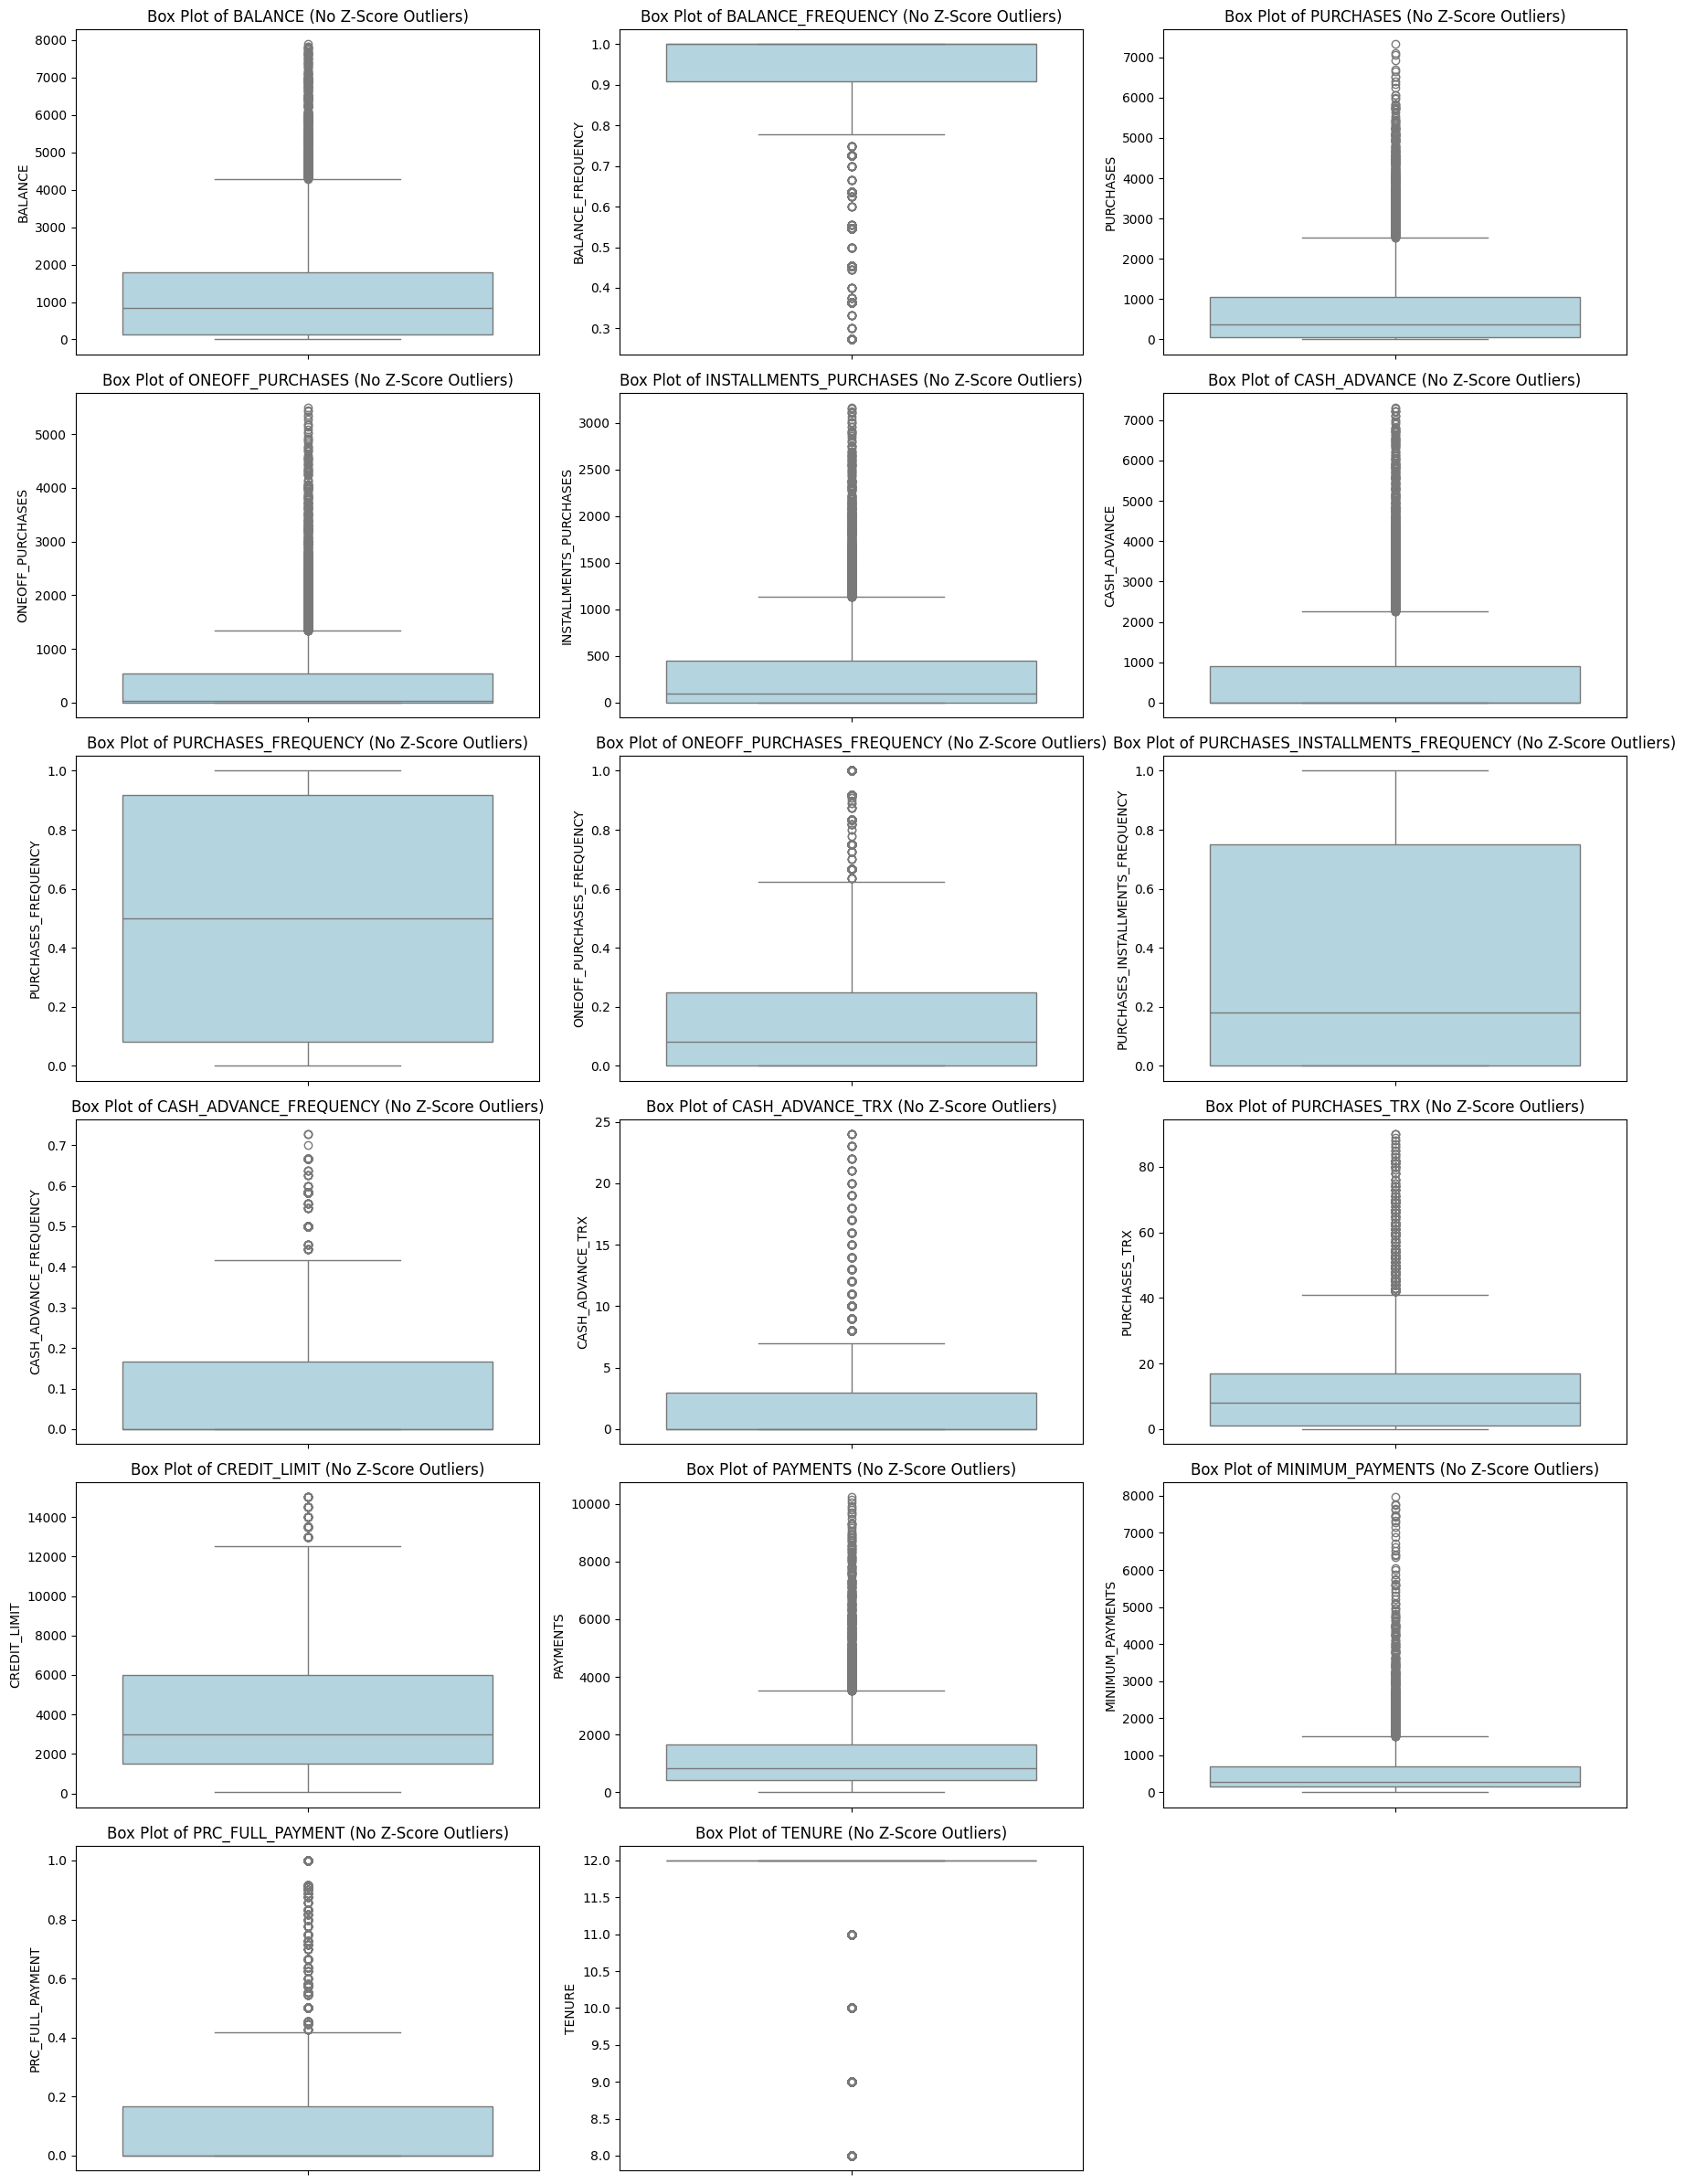

In [65]:
# Set up figure and axes for box plots
fig, axes = plt.subplots(nrows=num_columns//3 + (num_columns % 3 > 0), ncols=3, figsize=(18, 4 * (num_columns//3 + 1)))
axes = axes.flatten()

# Plot box plots
for i, col in enumerate(df_no_z_outliers.columns):
    sns.boxplot(y=df_no_z_outliers[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Box Plot of {col} (No Z-Score Outliers)')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

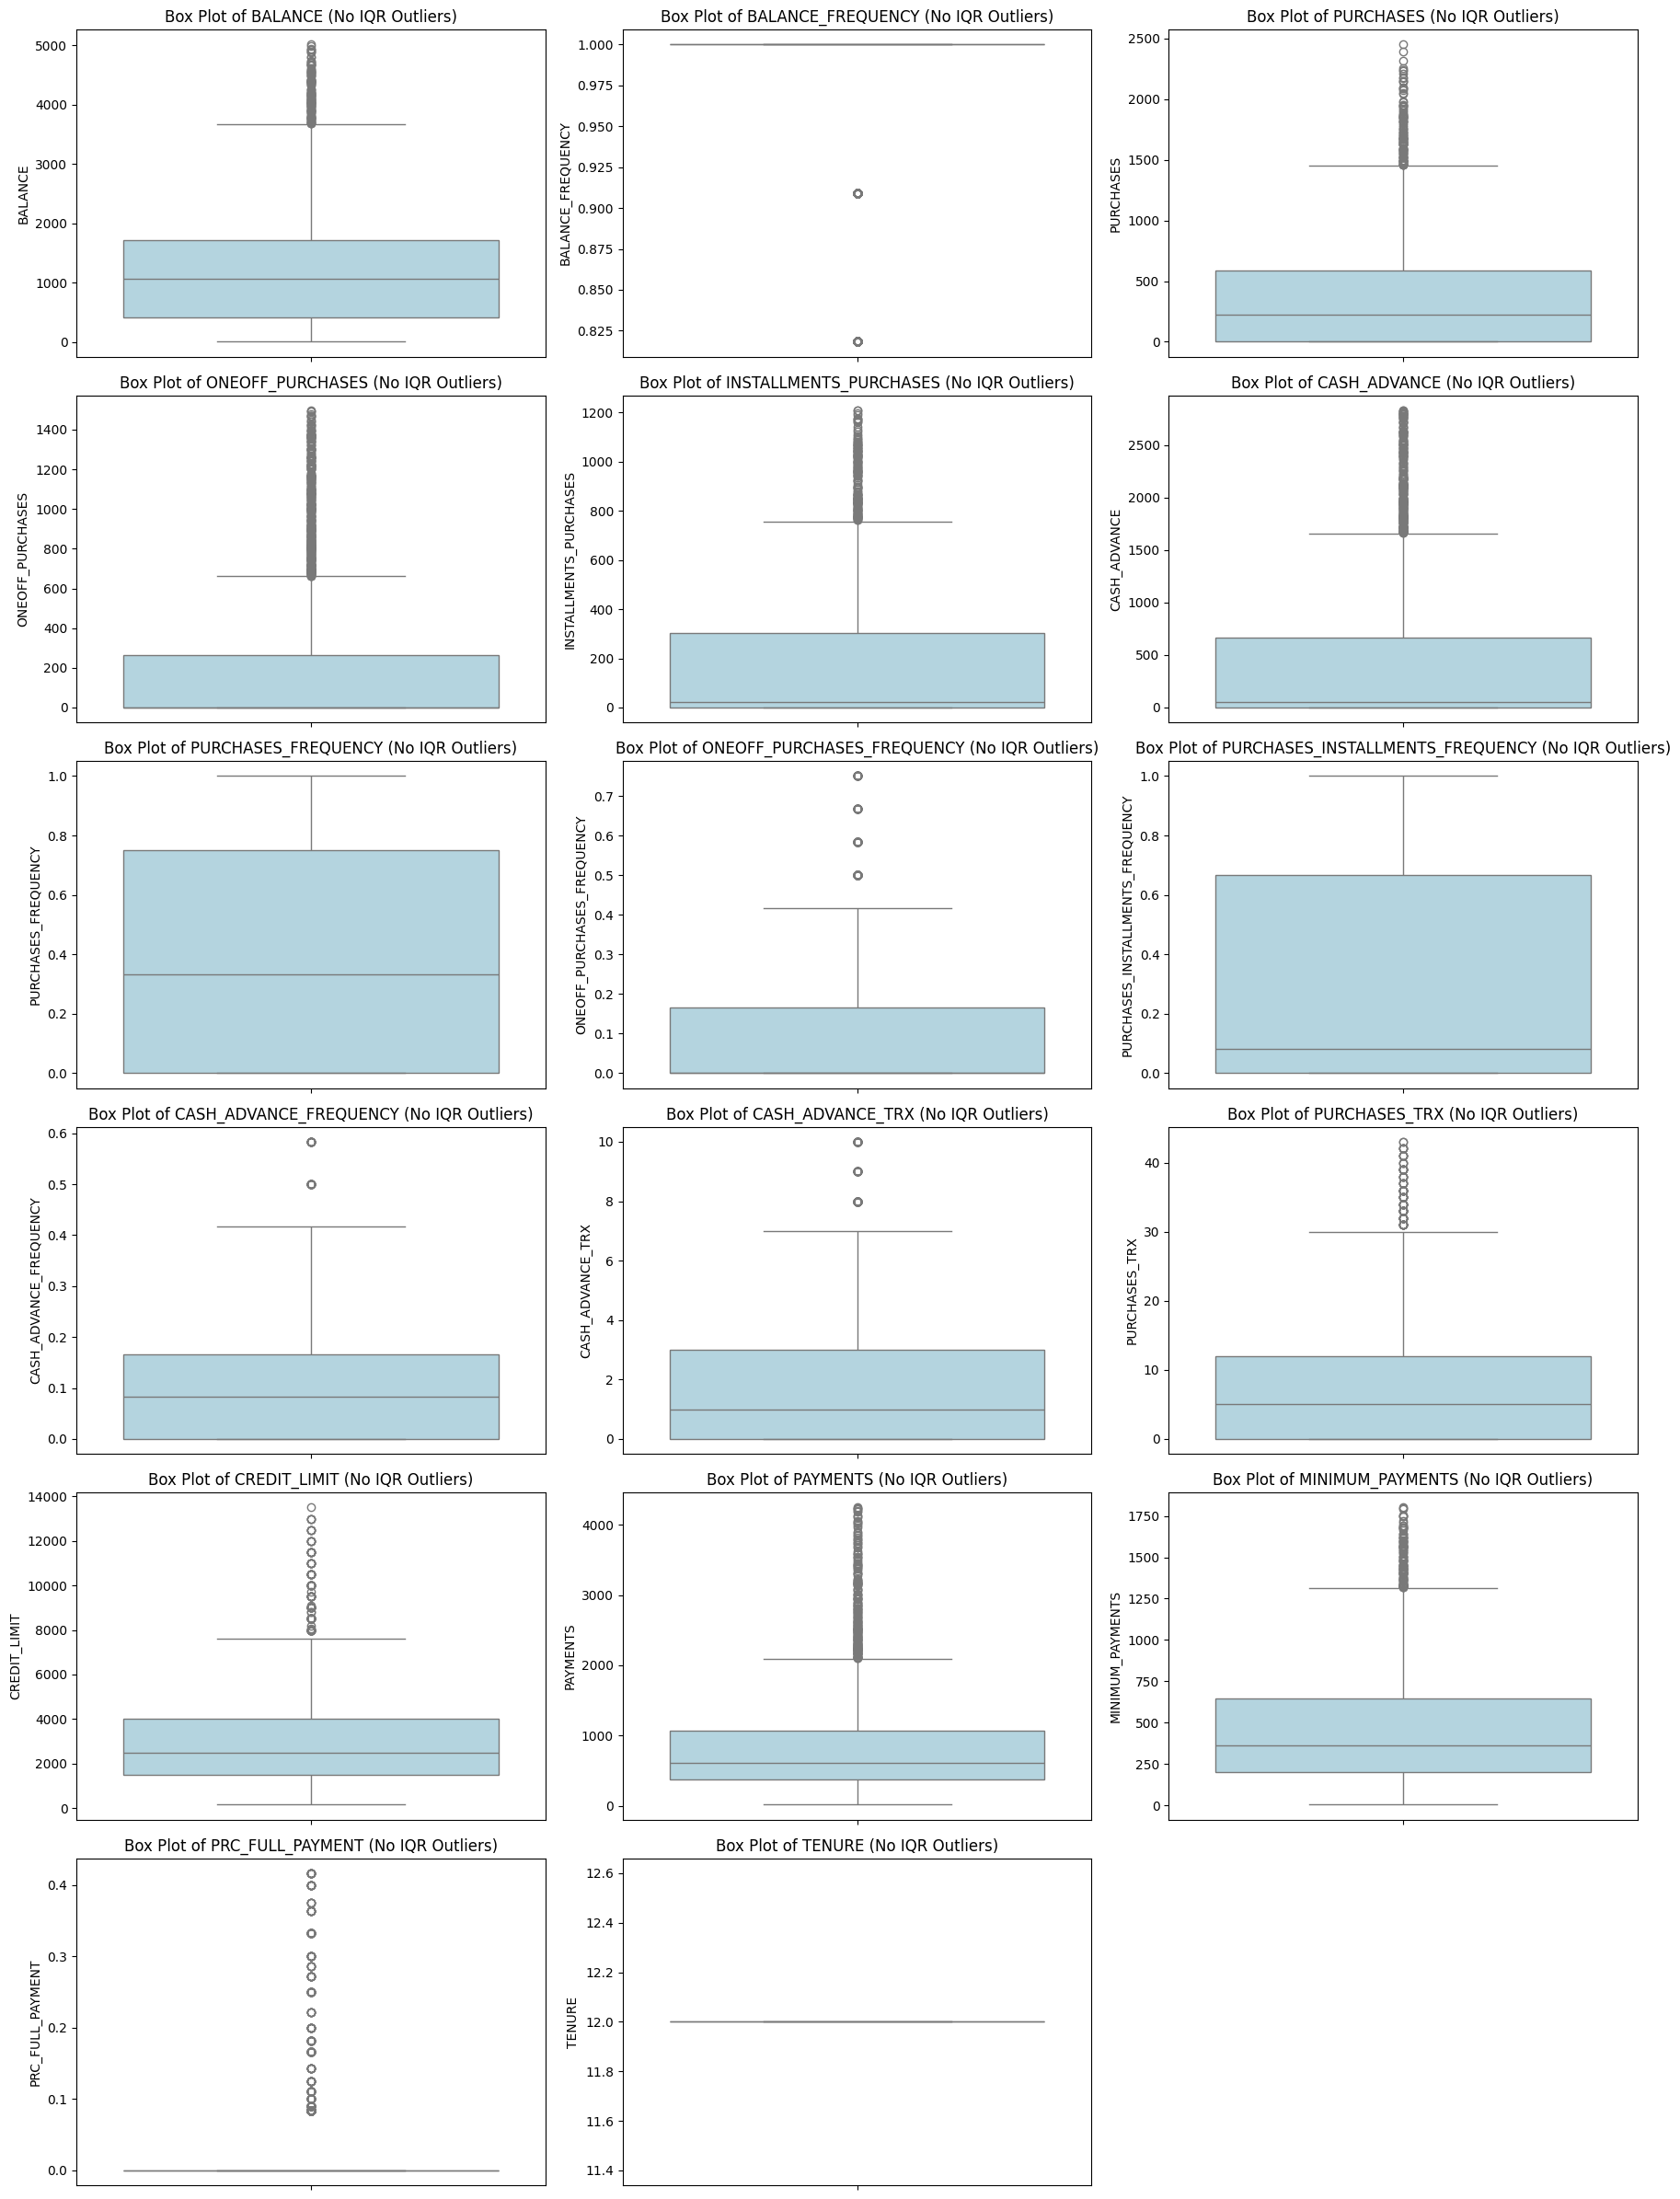

In [67]:
# Set up figure and axes for box plots
fig, axes = plt.subplots(nrows=num_columns//3 + (num_columns % 3 > 0), ncols=3, figsize=(18, 4 * (num_columns//3 + 1)))
axes = axes.flatten()

# Plot box plots
for i, col in enumerate(df_no_iqr_outliers.columns):
    sns.boxplot(y=df_no_iqr_outliers[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Box Plot of {col} (No IQR Outliers)')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [72]:
%%capture

# Side by side plot

import matplotlib.pyplot as plt
import seaborn as sns

# List of DataFrames for comparison
dfs = [numeric_df, df_no_z_outliers, df_no_iqr_outliers]
titles = ['Original Data', 'No Z-Score Outliers', 'No IQR Outliers']

# Determine the number of columns
num_columns = numeric_df.shape[1]

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=num_columns, ncols=3, figsize=(18, 4 * num_columns))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numeric column in each dataset
for i, col in enumerate(numeric_df.columns):
    for j, df in enumerate(dfs):
        sns.histplot(df[col], bins=30, kde=False, ax=axes[i*3 + j], color='skyblue')
        axes[i*3 + j].set_title(f'{col} - {titles[j]}')
        axes[i*3 + j].set_xlabel(col)
        axes[i*3 + j].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [71]:
%%capture

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=num_columns, ncols=3, figsize=(18, 4 * num_columns))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot box plots for each numeric column in each dataset
for i, col in enumerate(numeric_df.columns):
    for j, df in enumerate(dfs):
        sns.boxplot(y=df[col], ax=axes[i*3 + j], color='lightblue')
        axes[i*3 + j].set_title(f'{col} - {titles[j]}')
        axes[i*3 + j].set_xlabel('')
        axes[i*3 + j].set_ylabel(col)

plt.tight_layout()
plt.show()

Even after removing the outliers with both methods, the data is still heavily skewed.

### Applying log transform

In [73]:
log_transformed_df = np.log1p(numeric_df)  # np.log1p is used to handle zeros

In [74]:
lower_bound = numeric_df.quantile(0.01)
upper_bound = numeric_df.quantile(0.99)
quantile_filtered_df = numeric_df[(numeric_df > lower_bound) & (numeric_df < upper_bound)]


In [ ]:
# Select only numeric columns (excluding 'CUST_ID')
numeric_df = cleaned_df.drop(columns=['CUST_ID'])

# Z-Score Method
z_scores = np.abs(stats.zscore(numeric_df))
z_outliers = (z_scores > 3).any(axis=1)
df_no_z_outliers = numeric_df[~z_outliers]

# IQR Method
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
iqr_outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
df_no_iqr_outliers = numeric_df[~iqr_outliers]
